In [1]:
import sys
sys.path.append('C:\\Users\\99387\\AppData\\Local\\Programs\\Python\\Python38-32\\Lib\\site-packages')
sys.path.append('C:\\Users\\79853\\AppData\\Local\\Programs\\Python\\Python38-32\\Lib\\site-packages')

In [562]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from pylab import rcParams

%matplotlib inline

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 50)

In [4]:
def graf_3d (p1, p2, p3, p4):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(p1, p2, p3, c=p4)

    ax.set_xlabel(p1.name)
    ax.set_ylabel(p2.name)
    ax.set_zlabel(p3.name)
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);

In [5]:
def graf_2d (p1, p2, p3):
    df_train.plot(kind='scatter', x=p1.name, y=p2.name, 
                                             c=p3.name, cmap=plt.get_cmap('jet', p3.nunique()), figsize=(12,6))
    plt.xlabel(p1.name)
    plt.ylabel(p2.name)
    plt.title('2D mapping of objects'); 

In [6]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k');

In [7]:
def names():
    global S1, K1, L1, R1, F1, HF1, D1, S2, K2, L2, R2, D2, F2, HF2
    S1 = df_train['Square']
    K1 = df_train['KitchenSquare']
    L1 = df_train['LifeSquare']
    R1 = df_train['Rooms']
    D1 = df_train['DistrictId']
    F1 = df_train['Floor']
    HF1 = df_train['HouseFloor']
    S2 = df_test['Square']
    K2 = df_test['KitchenSquare']
    L2 = df_test['LifeSquare']
    R2 = df_test['Rooms']
    D2 = df_test['DistrictId']
    F2 = df_test['Floor']
    HF2 = df_test['HouseFloor']

In [8]:
DATASET_TRAIN_PATH = 'C:/Users/79853/Downloads/train.csv'
DATASET_TEST_PATH = 'C:/Users/79853/Downloads/test.csv'
#DATASET_TRAIN_PATH = 'C:/Users/99387/Downloads/train.csv'
#DATASET_TEST_PATH = 'C:/Users/99387/Downloads/test.csv'
df_train_orig = pd.read_csv(DATASET_TRAIN_PATH, index_col = 'Id')
df_test_orig = pd.read_csv(DATASET_TEST_PATH, index_col = 'Id')

In [9]:
df_train_orig.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [10]:
df_test_orig.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,nan,0,0,B
15856,74,2.00,69.26,nan,1.00,6,1.00,1977,0.08,B,B,6,1437,3,nan,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,nan,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,nan,0,0,A


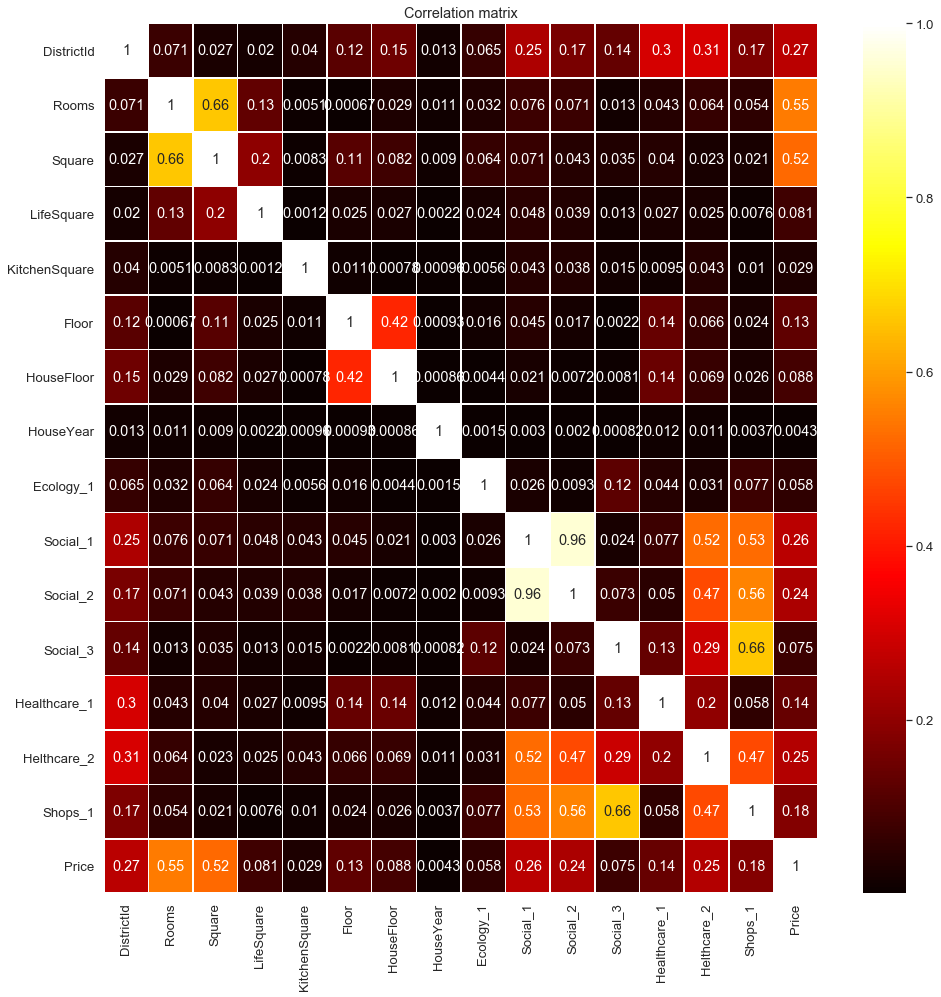

In [11]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_train_orig.corr().abs(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

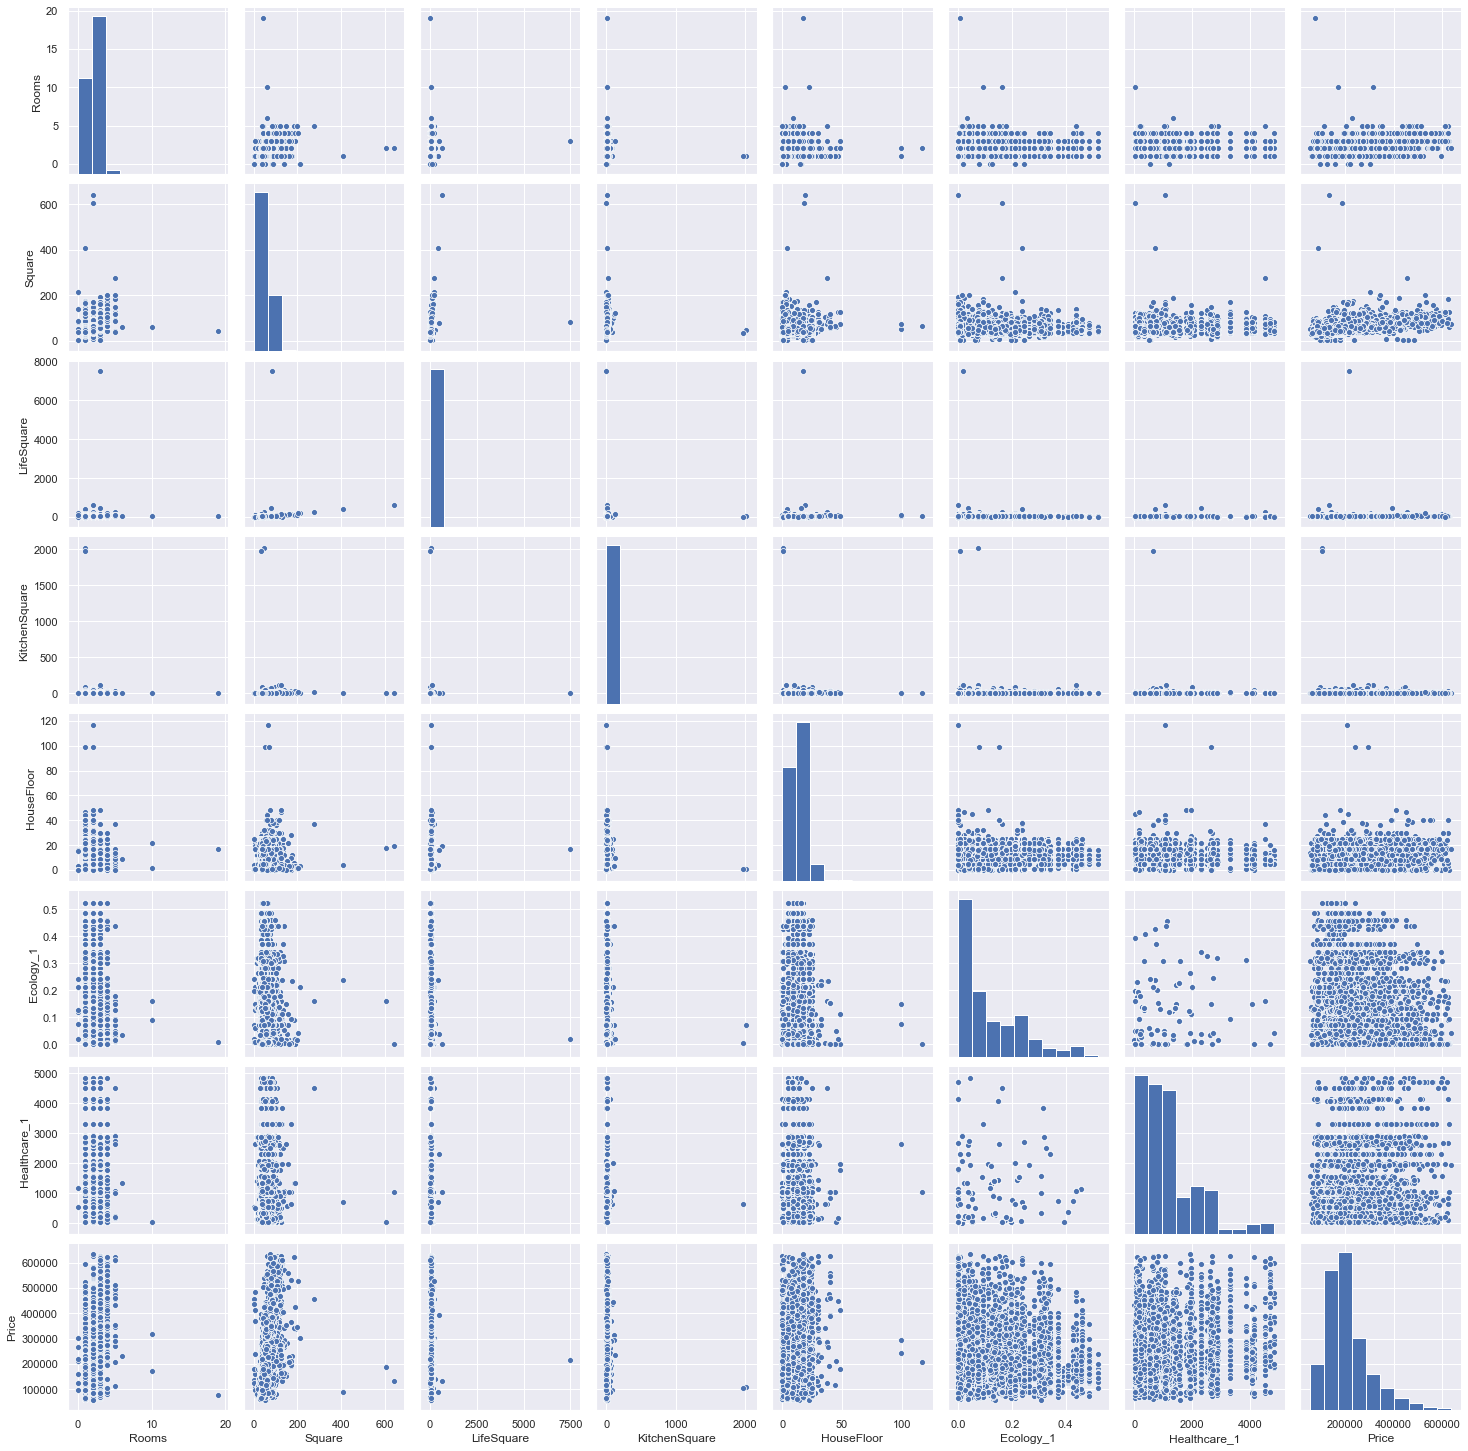

In [689]:
sns.set()
sns.pairplot(df_train_orig.select_dtypes(include = ['float64']))

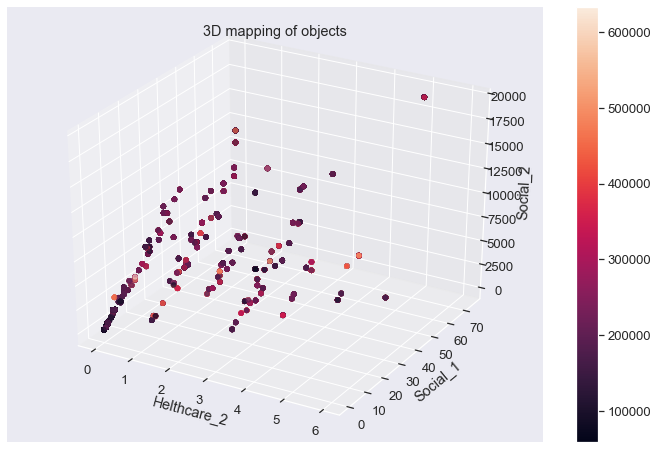

In [13]:
graf_3d(df_train_orig['Helthcare_2'], df_train_orig['Social_1'], df_train_orig['Social_2'], df_train_orig['Price'])

In [14]:
df_train_orig.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [15]:
df_train = df_train_orig.copy()
df_test = df_test_orig.copy()

# ВЫБРОСЫ + РЕДКИЕ КАТЕГОРИИ

### 1. объединим DistrictId со слишком маленьким предложением в один объект

In [16]:
district_offer = df_train['DistrictId'].copy().value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'district_offer'})
districts_keep = district_offer.loc[district_offer['district_offer'] > 4, 'DistrictId'].tolist()

In [17]:
df_train = df_train.merge(district_offer, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_offer, on='DistrictId', how='left').set_index(df_test.index)

In [18]:
df_train.loc[~df_train['DistrictId'].isin(districts_keep), 'DistrictId'] = 999
df_test.loc[~df_test['DistrictId'].isin(districts_keep), 'district_offer'] = 1
df_test.loc[~df_test['DistrictId'].isin(districts_keep), 'DistrictId'] = 999

### 2. Уберем слишком большое кол-вo комнат

In [20]:
names()
df_train.loc[R1 > 5, 'Rooms'] = R1.mode()[0]
df_test.loc[R2 > 5, 'Rooms'] = R1.mode()[0]

### 3. Уберем слишком большие площади

In [21]:
names()
df_train.loc[K1 > 150, 'KitchenSquare'] = K1.median()
df_test.loc[K2 > 150, 'KitchenSquare'] = K1.median()

In [22]:
names()
df_train.loc[L1 > 400, 'LifeSquare'] = L1.median()
df_test.loc[L2 > 400, 'LifeSquare'] = L1.median()

In [23]:
names()
df_train.loc[S1 > 400, 'Square'] = S1.median()
df_test.loc[S2 > 400, 'Square'] = S1.median()

### 4. Уберем слишком большие года

In [25]:
df_train.loc[df_train['HouseYear']> 2020, 'HouseYear'] = df_train['HouseYear'].median()
df_test.loc[df_test['HouseYear']>2020, 'HouseYear'] = df_train['HouseYear'].median()

In [26]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,district_offer
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,55.22,1.89,56.17,36.08,5.88,8.53,12.61,"1,984.86",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86",242.31
std,83.71,0.81,19.15,18.01,5.17,5.24,6.78,18.41,0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29",268.99
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78",1.00
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63",55.00
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64",104.00
75%,75.00,2.00,65.89,45.10,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46",511.00
max,999.00,5.00,275.65,263.54,123.00,42.00,117.00,"2,020.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47",851.00


# SQUARE + ROOMS

#### 1. добавим 4 признака: отношение площади и комнат к средним показателям по району и сами эти средние

In [27]:
average_rooms_sq_per_D = df_train.groupby(['DistrictId'], as_index=False)\
                                    .agg({'Rooms':'median', 'Square':'median'})\
                                    .rename(columns={'Rooms':'average_rooms_per_D', 'Square':'average_square_per_D'})

In [28]:
names()

df_train = df_train.merge(average_rooms_sq_per_D, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(average_rooms_sq_per_D, on='DistrictId', how='left').set_index(df_test.index)

In [29]:
names()

df_train.insert(3, '%average_rooms_per_D', R1/df_train['average_rooms_per_D']-1, True)
df_test.insert(3, '%average_rooms_per_D', R2/df_test['average_rooms_per_D']-1, True)
df_train.insert(4, '%average_square_per_D', S1/df_train['average_square_per_D']-1, True)
df_test.insert(4, '%average_square_per_D', S2/df_test['average_square_per_D']-1, True)

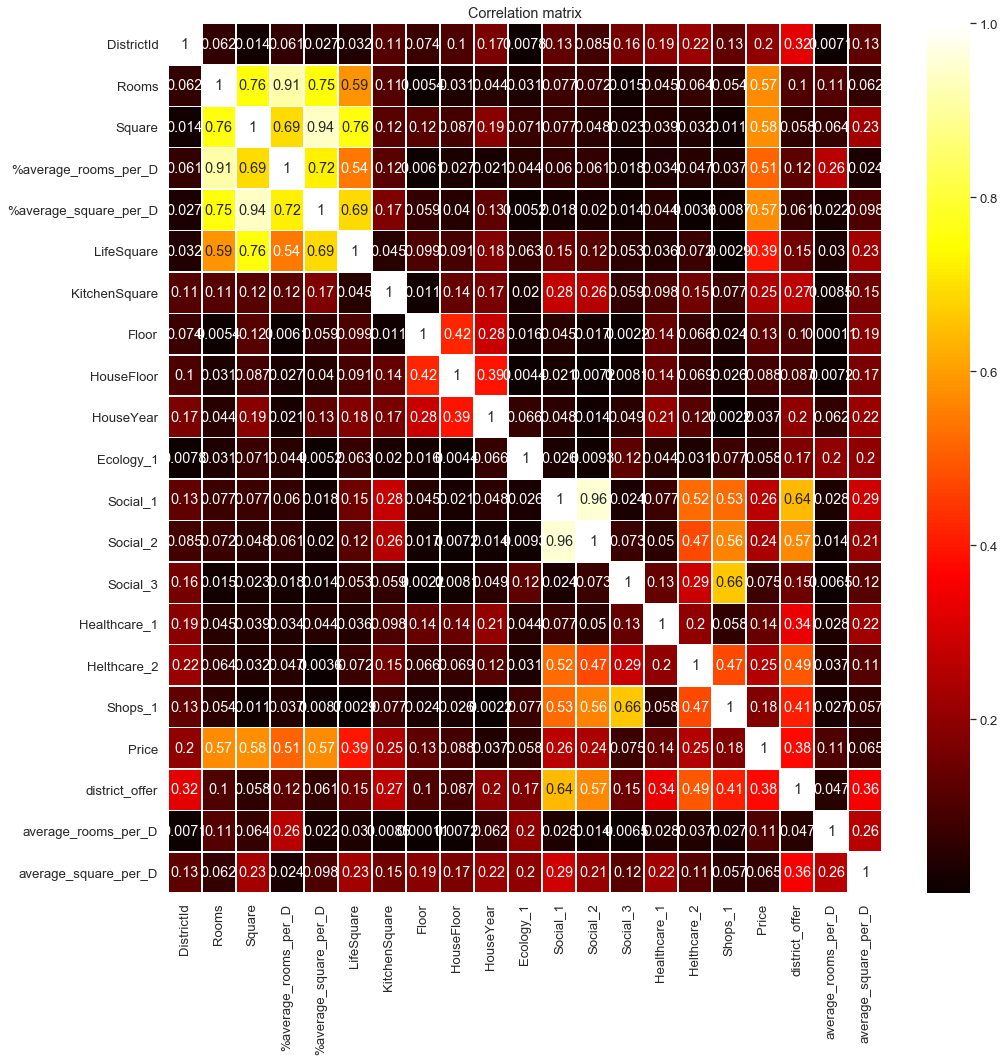

In [30]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_train.corr().abs(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

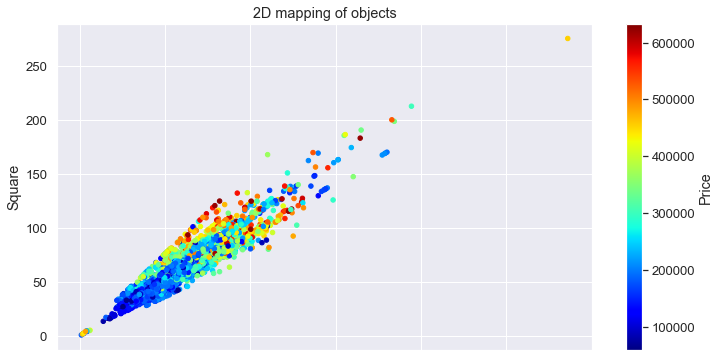

In [31]:
names()
graf_2d(df_train['%average_square_per_D'], S1, df_train['Price'])

как и ожидалось, новые признаки хорошо коррелируются с ценой

#### 2. Усилим square логарифмированием

In [32]:
names()

df_train.insert(4, 'square_log', np.log(S1), True)
df_test.insert(4, 'square_log', np.log(S2), True)

#### 3. Заменим пустые lifeSquare на среднее по группе по площади. Для начала выделим группы

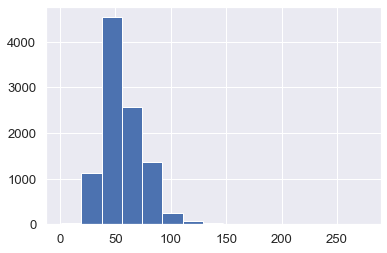

In [33]:
names()
plt.hist(S1, bins='sturges')
plt.show()

In [34]:
names()
square_boarders = np.histogram_bin_edges(S1, bins='sturges')


square_boarders = np.append(square_boarders[square_boarders<129], np.inf)
square_boarders[0] = 0

df_train.insert(5, "square_groups", pd.cut(S1, square_boarders, right = False), True)
df_test.insert(5, "square_groups", pd.cut(S2, square_boarders, right = False), True)

In [35]:
square_boarders

array([  0.        ,  19.43742046,  37.73798215,  56.03854384,
        74.33910552,  92.63966721, 110.9402289 ,          inf])

In [36]:
average_LS_per_SG = df_train.groupby(['square_groups'], as_index=False).agg({'LifeSquare':'median'}).rename(columns={'LifeSquare':'average_LS_per_SG'})

In [37]:
names()
df_train = df_train.merge(average_LS_per_SG, how = 'left', on = 'square_groups').set_index(df_train.index)
df_test = df_test.merge(average_LS_per_SG, how = 'left', on = 'square_groups').set_index(df_test.index)

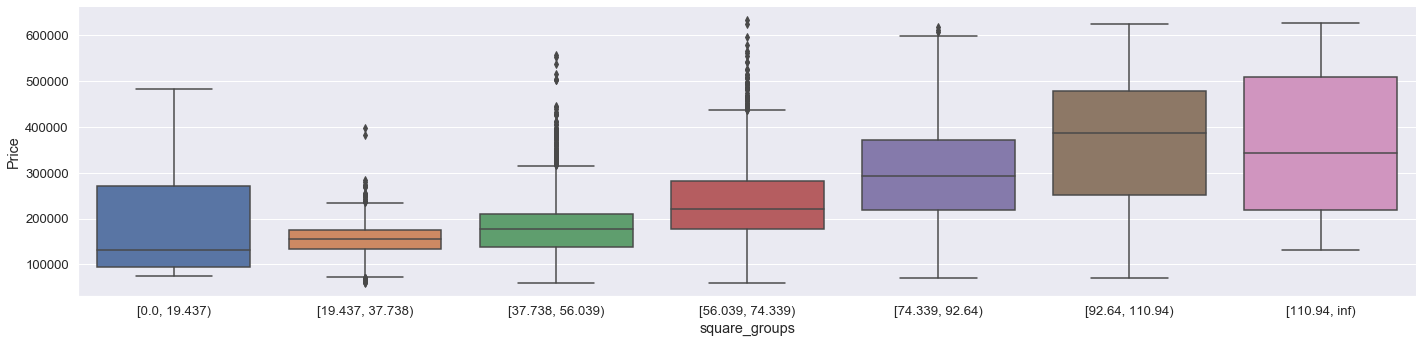

In [38]:
sns.catplot('square_groups', 'Price', kind="box", data=df_train, aspect=4/1);

In [39]:
names()
df_train.loc[L1.isna(), 'LifeSquare'] = df_train['average_LS_per_SG']
df_test.loc[L2.isna(), 'LifeSquare'] = df_test['average_LS_per_SG']

# DistrictID

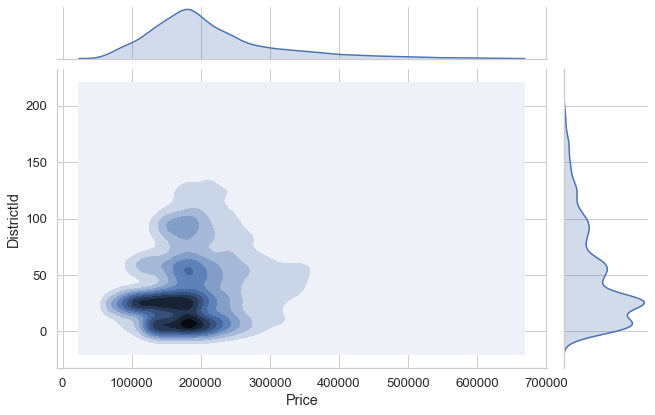

In [40]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train.loc[D1<300]['Price'], df_train.loc[D1<300]['DistrictId'], kind='kde')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

#### 1. разделим районы на группы по стоимости за квадратный метр

In [41]:
names()
df_train.insert(4, "pr_sqm", df_train['Price']/S1, True)
df_train.insert(2, "pr_room", df_train['Price']/(R1+1), True)

In [42]:
names()
pr_sqm_boarders = [np.percentile(df_train['pr_sqm'], i) for i in [0, 30, 50, 70, 90, 100]]
pr_sqm_boarders[0] = 0
pr_sqm_boarders[-1] = np.inf
pr_sqm_boarders

[0,
 3091.733088421599,
 3910.0523359988283,
 4534.4208292675185,
 5419.723198505281,
 inf]

In [43]:
names()
pr_room_boarders = [np.percentile(df_train['pr_room'], i) for i in [0, 30, 50, 70, 90, 100]]
pr_room_boarders[0] = 0
pr_room_boarders[-1] = np.inf
pr_room_boarders

[0,
 61280.75831479452,
 71028.98153601003,
 83482.6197513335,
 106696.8465448506,
 inf]

In [44]:
df_train.insert(1, 'District_Av_pr_room', df_train.groupby(['DistrictId'])
                ['pr_room'].transform(lambda x: x.median()), True)

df_train.insert(2, 'District_Av_pr_sqm', df_train.groupby(['DistrictId'])
                ['pr_sqm'].transform(lambda x: x.median()), True)

In [45]:
df_train.insert(2, 'District_Value_2', pd.cut(df_train['District_Av_pr_room'], pr_room_boarders, labels = ['Cheap', 'Econom', 'Medium','Resp', 'Lux'], right = False), True)

df_train.insert(3, 'District_Value', pd.cut(df_train['District_Av_pr_sqm'], pr_sqm_boarders, labels = ['Cheap', 'Econom', 'Medium','Resp', 'Lux'], right = False), True)


In [46]:
#убираем признаки с участием целевой переменной
df_train.drop(['pr_sqm', 'pr_room'], axis =1, inplace=True)

In [47]:
#добавляем все в тест
df_test = df_test.merge(df_train.loc[:,['DistrictId', 'District_Value','District_Value_2', 
                                        'District_Av_pr_sqm','District_Av_pr_room']].drop_duplicates(), how = 'left', on = 'DistrictId').set_index(df_test.index)

In [48]:
df_train.shape, df_test.shape

((10000, 31), (5000, 30))

In [49]:
df_train.describe()

,DistrictId,District_Av_pr_room,District_Av_pr_sqm,Rooms,Square,%average_rooms_per_D,square_log,%average_square_per_D,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,district_offer,average_rooms_per_D,average_square_per_D,average_LS_per_SG
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,55.22,"74,324.50","3,925.96",1.89,56.17,-0.03,3.98,0.06,36.48,5.88,8.53,12.61,"1,984.86",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86",242.31,1.97,53.19,35.59
std,83.71,"16,480.84",985.99,0.81,19.15,0.44,0.33,0.35,16.79,5.17,5.24,6.78,18.41,0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29",268.99,0.23,5.96,11.12
min,0.00,"48,004.60","2,273.50",0.00,1.14,-1.00,0.13,-0.98,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78",1.00,1.00,36.43,8.82
25%,20.00,"61,127.05","2,938.05",1.00,41.77,-0.50,3.73,-0.20,24.71,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63",55.00,2.00,47.94,29.29
50%,36.00,"72,790.74","4,134.35",2.00,52.51,0.00,3.96,0.00,33.02,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64",104.00,2.00,53.95,29.29
75%,75.00,"81,691.65","4,562.03",2.00,65.89,0.00,4.19,0.25,44.61,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46",511.00,2.00,56.69,41.19
max,999.00,"181,135.52","8,645.17",5.00,275.65,3.00,5.62,4.72,263.54,123.00,42.00,117.00,"2,020.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47",851.00,3.00,76.31,79.80


In [50]:
#просто сортировка столбцов одинаковая
col = df_train.columns.to_list()
col.remove('Price')

In [51]:
df_test = df_test[col]

#### 2. Заменим пустые HealthCare_1 на среднее по DistrictId

In [52]:
HC1 = df_train.groupby(['DistrictId'], as_index=False).agg({'Healthcare_1':'median'}).rename(columns={'Healthcare_1':'average_HC1'})

In [53]:
HC1['average_HC1'].fillna(df_train['Healthcare_1'].median(), inplace=True)

In [54]:
names()
df_train = df_train.merge(HC1, how = 'left', on = 'DistrictId').set_index(df_train.index)
df_test = df_test.merge(HC1, how = 'left', on = 'DistrictId').set_index(df_test.index)

In [55]:
names()
df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['average_LS_per_SG']
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df_test['average_LS_per_SG']

# HOUSE YEAR

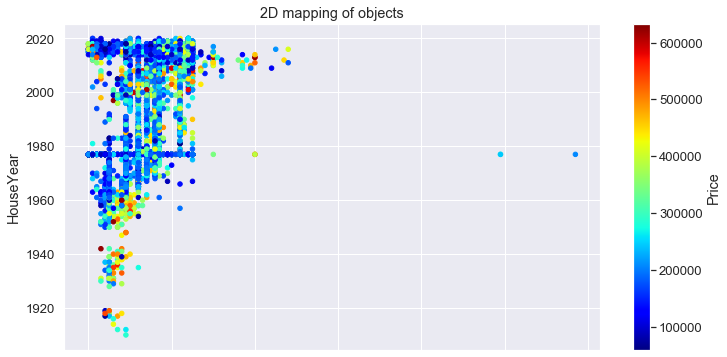

In [57]:
graf_2d(df_train['HouseFloor'], df_train['HouseYear'], df_train['Price'])

выделим 3 группы домов

In [58]:
names()
HY_boarders = [0, 1965, 2010, np.inf]

df_train.insert(12, "year_groups", pd.cut( df_train['HouseYear'], HY_boarders, labels = ['old', 'med', 'new'], right = False), True)
df_test.insert(12, "year_groups", pd.cut(df_test['HouseYear'], HY_boarders, labels = ['old', 'med', 'new'], right = False), True)

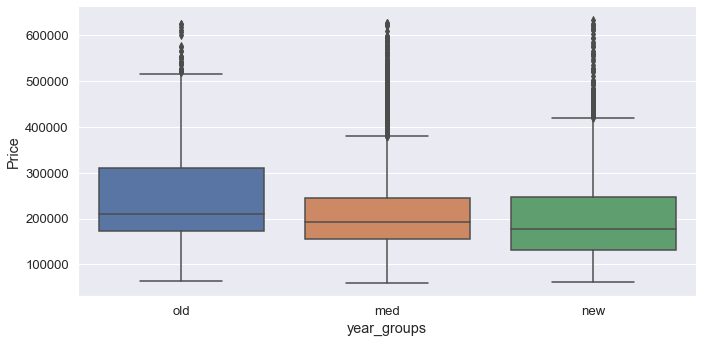

In [59]:
sns.catplot('year_groups', 'Price', kind="box", data=df_train, aspect=2/1);

# Обработка категориальных признаков

In [60]:
df_train.describe(include = ['object', 'category'])

,District_Value_2,District_Value,square_groups,year_groups,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000,10000,10000,10000,10000
unique,5,5,7,3,2,2,2
top,Medium,Medium,"[37.738, 56.039)",med,B,B,B
freq,3176,3205,4541,7300,9903,9725,9175


In [61]:
sq_gr_dummies1 = pd.get_dummies(df_train['square_groups'], prefix = 'sq_group')
sq_gr_dummies2 = pd.get_dummies(df_test['square_groups'], prefix='sq_group')

eco2_dummies1 = pd.get_dummies(df_train['Ecology_2'], prefix = 'Ecology_2')
eco2_dummies2 = pd.get_dummies(df_test['Ecology_2'], prefix='Ecology_2')

eco3_dummies1 = pd.get_dummies(df_train['Ecology_3'], prefix = 'Ecology_3')
eco3_dummies2 = pd.get_dummies(df_test['Ecology_3'], prefix='Ecology_3')

shop2_dummies1 = pd.get_dummies(df_train['Shops_2'], prefix = 'Shops_2')
shop2_dummies2 = pd.get_dummies(df_test['Shops_2'], prefix='Shops_2')

D_value_dummies1 = pd.get_dummies(df_train['District_Value'], prefix = 'D_V')
D_value_dummies2 = pd.get_dummies(df_test['District_Value'], prefix='D_V')

D_value_dummies_21 = pd.get_dummies(df_train['District_Value_2'], prefix = 'D_V_2')
D_value_dummies_22 = pd.get_dummies(df_test['District_Value_2'], prefix='D_V_2')

HY_dummies1 = pd.get_dummies(df_train['year_groups'], prefix = 'year_groups')
HY_dummies2 = pd.get_dummies(df_test['year_groups'], prefix='year_groups')

df_train = pd.concat([df_train, sq_gr_dummies1, eco2_dummies1, eco3_dummies1, shop2_dummies1, 
                      D_value_dummies1, D_value_dummies_21, HY_dummies1], axis=1)
df_test = pd.concat([df_test, sq_gr_dummies2, eco2_dummies2, eco3_dummies2, shop2_dummies2, 
                     D_value_dummies2, D_value_dummies_22, HY_dummies2], axis=1)

In [62]:
df_test.describe()

,DistrictId,District_Av_pr_room,District_Av_pr_sqm,Rooms,Square,%average_rooms_per_D,square_log,%average_square_per_D,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,district_offer,average_rooms_per_D,average_square_per_D,average_LS_per_SG,average_HC1,...,"sq_group_[19.437, 37.738)","sq_group_[37.738, 56.039)","sq_group_[56.039, 74.339)","sq_group_[74.339, 92.64)","sq_group_[92.64, 110.94)","sq_group_[110.94, inf)",Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,D_V_Cheap,D_V_Econom,D_V_Medium,D_V_Resp,D_V_Lux,D_V_2_Cheap,D_V_2_Econom,D_V_2_Medium,D_V_2_Resp,D_V_2_Lux,year_groups_old,year_groups_med,year_groups_new
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00",...,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,57.48,"74,596.61","3,949.72",1.91,56.45,-0.01,3.98,0.07,36.56,5.85,8.63,12.60,"1,984.39",0.12,24.93,"5,406.90",8.26,618.91,1.32,4.24,235.41,1.97,53.12,35.71,"1,018.52",...,0.12,0.44,0.26,0.14,0.03,0.01,0.01,0.99,0.03,0.97,0.08,0.92,0.26,0.14,0.32,0.21,0.07,0.27,0.19,0.33,0.17,0.04,0.10,0.73,0.17
std,92.75,"16,338.92",982.08,0.81,19.09,0.46,0.33,0.36,16.65,4.85,5.48,6.79,18.57,0.12,17.53,"4,026.61",23.86,938.06,1.48,4.78,265.91,0.23,5.88,11.13,901.19,...,0.32,0.50,0.44,0.35,0.16,0.11,0.10,0.10,0.17,0.17,0.28,0.28,0.44,0.35,0.47,0.41,0.25,0.44,0.40,0.47,0.38,0.20,0.29,0.44,0.38
min,0.00,"48,004.60","2,273.50",0.00,1.38,-1.00,0.32,-0.97,0.33,0.00,1.00,0.00,"1,908.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,1.00,1.00,36.43,8.82,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,21.00,"61,127.05","2,949.98",1.00,41.91,-0.50,3.74,-0.20,24.82,1.00,4.00,9.00,"1,973.00",0.02,6.00,"1,564.00",0.00,29.29,0.00,1.00,51.00,2.00,47.65,29.29,240.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,37.00,"73,740.38","4,158.19",2.00,52.92,0.00,3.97,0.01,33.24,6.00,7.00,12.00,"1,977.00",0.07,25.00,"5,285.00",2.00,65.14,1.00,3.00,97.00,2.00,53.95,29.29,900.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,77.00,"81,740.47","4,571.66",2.00,66.29,0.33,4.19,0.27,44.77,9.00,12.00,17.00,"2,000.00",0.20,36.00,"7,287.00",5.00,990.00,2.00,6.00,511.00,2.00,56.69,41.19,"1,322.00",...,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
max,999.00,"181,135.52","8,645.17",5.00,223.45,3.00,5.41,3.38,303.07,112.00,78.00,99.00,"2,020.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,851.00,3.00,76.31,79.80,"4,849.00",...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


сохраним результат

In [142]:
df_train_clean = df_train.copy()
df_test_clean = df_test.copy()

In [143]:
df_train_clean['Rooms'] = df_train_clean['Rooms'].astype(np.uint8)
df_test_clean['Rooms'] = df_test_clean['Rooms'].astype(np.uint8)

# СТРОИМ МОДЕЛЬ

In [144]:
df_train_clean.select_dtypes(include = ['float64', 'int64', 'uint8']).columns

Index(['DistrictId', 'District_Av_pr_room', 'District_Av_pr_sqm', 'Rooms',
       'Square', '%average_rooms_per_D', 'square_log', '%average_square_per_D',
       'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
       'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price', 'district_offer',
       'average_rooms_per_D', 'average_square_per_D', 'average_LS_per_SG',
       'average_HC1', 'sq_group_[0.0, 19.437)', 'sq_group_[19.437, 37.738)',
       'sq_group_[37.738, 56.039)', 'sq_group_[56.039, 74.339)',
       'sq_group_[74.339, 92.64)', 'sq_group_[92.64, 110.94)',
       'sq_group_[110.94, inf)', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'D_V_Cheap', 'D_V_Econom',
       'D_V_Medium', 'D_V_Resp', 'D_V_Lux', 'D_V_2_Cheap', 'D_V_2_Econom',
       'D_V_2_Medium', 'D_V_2_Resp', 'D_V_2_Lux', 'year_groups_old',
       'year_groups_med', 'year_groups_new'],
      dtype='obj

In [475]:
#ОТБОР ПРИЗНАКОВ
features_new = [#'DistrictId', 
    'District_Av_pr_room', 
    'District_Av_pr_sqm', 
    'Rooms',
    'Square', 
    '%average_rooms_per_D', 
    'square_log', 
    '%average_square_per_D',
    'LifeSquare', 
    'KitchenSquare', 
    'Floor', 
    'HouseFloor', 
    'HouseYear',
    'Ecology_1', 
    'Social_1',
    'Social_2', 
    'Social_3', 
    'Healthcare_1',
    'Helthcare_2',
    'Shops_1', 
    #'district_offer',
    'average_rooms_per_D', 
    'average_square_per_D',
    #'average_LS_per_SG',
    #'average_HC1',
    #'sq_group_[0.0, 19.437)',
    #'sq_group_[19.437, 37.738)',
    #'sq_group_[37.738, 56.039)',
    #'sq_group_[56.039, 74.339)',
    #'sq_group_[74.339, 92.64)', 
    #'sq_group_[92.64, 110.94)',
    #'sq_group_[110.94, inf)',
    'Ecology_2_A', 
    'Ecology_2_B', 
    #'Ecology_3_A',
    #'Ecology_3_B', 
    #'Shops_2_A',
    #'Shops_2_B', 
    'D_V_Cheap',
    'D_V_Econom',
    'D_V_Medium',
    'D_V_Resp',
    'D_V_Lux',
    #'D_V_2_Cheap',
    #'D_V_2_Econom',
    #'D_V_2_Medium', 
    #'D_V_2_Resp',
    #'D_V_2_Lux', 
    'year_groups_old',
    'year_groups_med', 
    'year_groups_new'
]

In [476]:
X = df_train_clean[features_new]
y = df_train_clean['Price']

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [586]:
gb_model = GradientBoostingRegressor()

In [591]:
cv = KFold(n_splits=10, random_state=100, shuffle=True)
params = {'n_estimators':[100, 200], 
          'max_depth':[3, 5, 7],
         'max_features': [6, 7, 9]
         }

In [592]:
gs = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=cv, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...0.0,
                                                 n_estimators=100,
                                          

In [593]:
gs.best_params_

{'max_depth': 7, 'max_features': 9, 'n_estimators': 200}

In [594]:
gs.best_score_

0.7634339882190588

In [487]:
boost_best = gs.best_estimator_

предсказываем из всего теста

In [488]:
y_pred = boost_best.predict(df_test_clean[features_new])

In [489]:
preds = pd.DataFrame()
preds['Id'] = df_test_clean.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,"151,250.32"
1,15856,"223,945.14"
2,5480,"223,456.86"
3,15664,"351,290.85"
4,14275,"141,902.99"


In [490]:
preds.to_csv('EkaterinaArseneva_predictions.csv', index=False)

# КЛАСТЕРИЗАЦИЯ - спойлер - не дала особого увеличения r2

#### для начала отмасштабируем признаки

In [496]:
scaler = StandardScaler()
X1 = df_train_clean[features_new]
X2 = df_test_clean[features_new]

In [497]:
df_train_scaled = pd.DataFrame(scaler.fit_transform(X1),
                        columns=X1.columns, 
                        index=X1.index)
df_test_scaled = pd.DataFrame(scaler.transform(X2), 
                        columns = X2.columns, 
                        index = X2.index)

In [498]:
df_train_scaled.describe()

,District_Av_pr_room,District_Av_pr_sqm,Rooms,Square,%average_rooms_per_D,square_log,%average_square_per_D,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,average_rooms_per_D,average_square_per_D,Ecology_2_A,Ecology_2_B,D_V_Cheap,D_V_Econom,D_V_Medium,D_V_Resp,D_V_Lux,year_groups_old,year_groups_med,year_groups_new
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.60,-1.68,-2.32,-2.87,-2.20,-11.79,-2.94,-2.15,-1.14,-1.44,-1.86,-4.07,-1.00,-1.41,-1.29,-0.34,-0.66,-0.88,-0.88,-4.20,-2.81,-0.10,-10.10,-0.61,-0.39,-0.69,-0.52,-0.25,-0.33,-1.64,-0.46
25%,-0.80,-1.00,-1.09,-0.75,-1.06,-0.75,-0.74,-0.70,-0.94,-0.86,-0.53,-0.59,-0.85,-1.07,-0.95,-0.34,-0.63,-0.88,-0.67,0.11,-0.88,-0.10,0.10,-0.61,-0.39,-0.69,-0.52,-0.25,-0.33,-1.64,-0.46
50%,-0.09,0.21,0.14,-0.19,0.07,-0.04,-0.17,-0.21,0.02,-0.29,0.06,-0.43,-0.36,0.02,-0.02,-0.25,-0.61,-0.21,-0.26,0.11,0.13,-0.10,0.10,-0.61,-0.39,-0.69,-0.52,-0.25,-0.33,0.61,-0.46
75%,0.45,0.65,0.14,0.51,0.07,0.65,0.52,0.48,0.60,0.66,0.65,0.88,0.65,0.65,0.47,-0.13,0.41,0.46,0.37,0.11,0.59,-0.10,0.10,1.63,-0.39,1.46,-0.52,-0.25,-0.33,0.61,-0.46
max,6.48,4.79,3.83,11.46,6.87,5.04,13.18,13.52,22.64,6.39,15.41,1.91,3.39,2.81,3.43,5.58,4.60,3.13,3.91,4.42,3.88,10.10,0.10,1.63,2.56,1.46,1.92,3.97,3.07,0.61,2.18


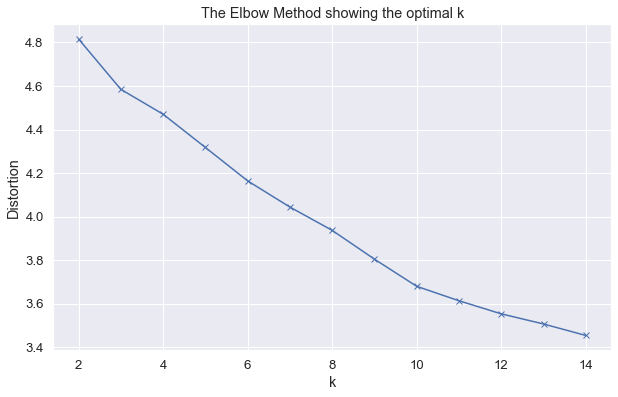

In [517]:
apply_elbow_method(df_train_scaled)

In [521]:
n_com = 10
pca = PCA(n_components=n_com)
components = pca.fit_transform(df_train_scaled)
components_train = pd.DataFrame(data = components, 
                                      columns = ['component_'+str(i+1) for i in range(n_com)],
                                      index=df_train_scaled.index)

In [523]:
components = pca.transform(df_test_scaled)
components_test = pd.DataFrame(data = components, 
                                      columns = ['component_'+str(i+1) for i in range(n_com)],
                                      index=df_test_scaled.index)

In [524]:
df_train_pca = pd.concat([df_train_scaled, 
                   components_train], axis=1)
df_test_pca = pd.concat([df_test_scaled, 
                   components_test], axis=1)

In [525]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features)), '\n')

1 component: 16.65% of initial variance
-0.266 x Social_2 + -0.336 x KitchenSquare + 0.106 x Helthcare_2 + 0.216 x Social_1 + 0.104 x D_V_Lux + 0.215 x D_V_Resp + 0.161 x D_V_Cheap + 0.215 x LifeSquare + -0.096 x %average_rooms_per_D + 0.092 x District_Av_pr_sqm + 0.087 x District_Av_pr_room + 0.173 x square_log + -0.034 x Rooms + -0.315 x %average_square_per_D + -0.282 x Square 

2 component: 15.88% of initial variance
0.185 x Social_2 + 0.185 x KitchenSquare + 0.379 x Helthcare_2 + 0.372 x Social_1 + 0.359 x D_V_Lux + 0.365 x D_V_Resp + 0.380 x D_V_Cheap + 0.299 x LifeSquare + 0.132 x %average_rooms_per_D + 0.018 x District_Av_pr_sqm + 0.011 x District_Av_pr_room + 0.022 x square_log + -0.019 x Rooms + 0.146 x %average_square_per_D + 0.141 x Square 

3 component: 8.28% of initial variance
-0.179 x Social_2 + -0.080 x KitchenSquare + 0.143 x Helthcare_2 + 0.030 x Social_1 + 0.164 x D_V_Lux + 0.031 x D_V_Resp + 0.107 x D_V_Cheap + 0.013 x LifeSquare + -0.101 x %average_rooms_per_D + -0

# СТРОИМ МОДЕЛЬ C PCA

In [595]:
X = df_train_pca
y = df_train_clean['Price']

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [597]:
gb_model = GradientBoostingRegressor()

In [598]:
cv = KFold(n_splits=10, random_state=100, shuffle=True)
params = {'n_estimators':[100, 200], 
          'max_depth':[3, 5, 7],
         'max_features': [6, 7, 9]
         }

In [599]:
gs_clastarized = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=cv, n_jobs=-1)
gs_clastarized.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...0.0,
                                                 n_estimators=100,
                                          

In [600]:
gs_clastarized.best_params_

{'max_depth': 5, 'max_features': 7, 'n_estimators': 200}

In [601]:
gs_clastarized.best_score_

0.7643432227845907

In [554]:
boost_best_2 = gs_clastarized.best_estimator_

предсказываем из всего теста

In [602]:
y_pred = boost_best.predict(df_test_pca)

In [603]:
preds = pd.DataFrame()
preds['Id'] = df_test_pca.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,"151,717.23"
1,15856,"221,933.97"
2,5480,"260,134.64"
3,15664,"317,457.35"
4,14275,"137,611.41"


In [604]:
preds.to_csv('EkaterinaArseneva_predictions_clasterized.csv', index=False)